In [2]:
# import the modules that we need and specify the folder which contains the files
import pandas as pd
import glob, os
import numpy as np
import matplotlib as mpl

from pylab import imshow
from skimage import io
import skimage
from matplotlib import pyplot as plt
import mahotas as mh
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

from skimage.feature import blob_log
from skimage.filters import threshold_otsu
from math import sqrt

In [3]:
image = io.imread('h1-6.tif')
image.shape

(1024, 1024, 3)

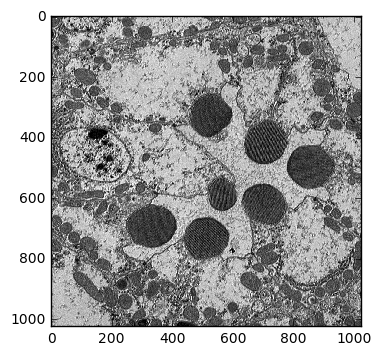

In [4]:
# select the grayscale dimension
image = image[..., 1]
imshow(image)

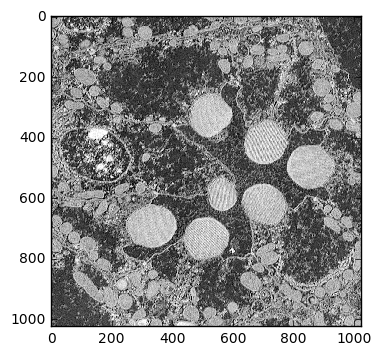

In [5]:
# negative img
imageneg = np.invert(image)
imshow(imageneg)

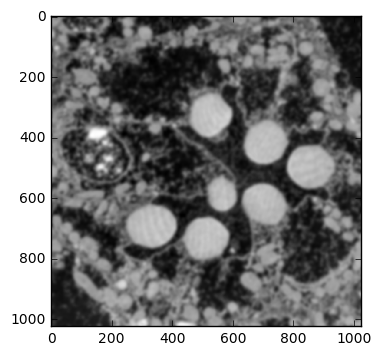

In [6]:
# guassian filter
imageneg = skimage.filters.gaussian(imageneg, 5)
imshow(imageneg)

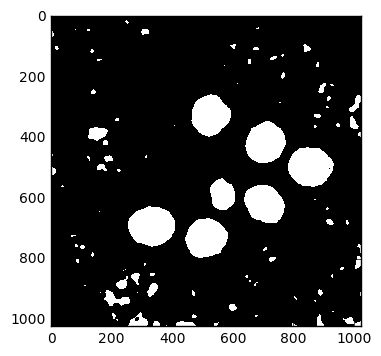

In [7]:
# thresholding
threshold_global_otsu = threshold_otsu(imageneg)
global_otsu = imageneg >= threshold_global_otsu * 1.45
imshow(global_otsu)

7


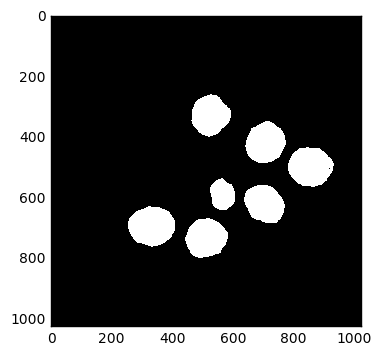

In [8]:
# segmentation
labeled, numberOfNuclei = mh.label(global_otsu)
original_label = labeled

max_size = 20000
min_size = 5000

sizes = mh.labeled.labeled_size(labeled)

too_big = np.where(sizes > max_size)
labeled = mh.labeled.remove_regions(labeled, too_big)

too_small = np.where(sizes < min_size)
labeled = mh.labeled.remove_regions(labeled, too_small)

# Remove cells at the borders
labeled = mh.labeled.remove_bordering(labeled)

# Relabel everthing
relabeled, n_nuclei = mh.labeled.relabel(labeled)

relabeledf = (relabeled > 0)

imshow(relabeledf)
print(n_nuclei)

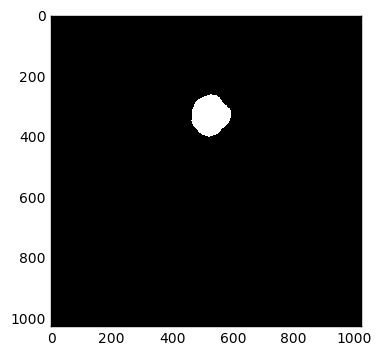

In [15]:
imshow(relabeled == 1)

In [13]:
image[mask]

array([22185,  6630,  7650, ..., 18360, 15045,  8415], dtype=uint16)

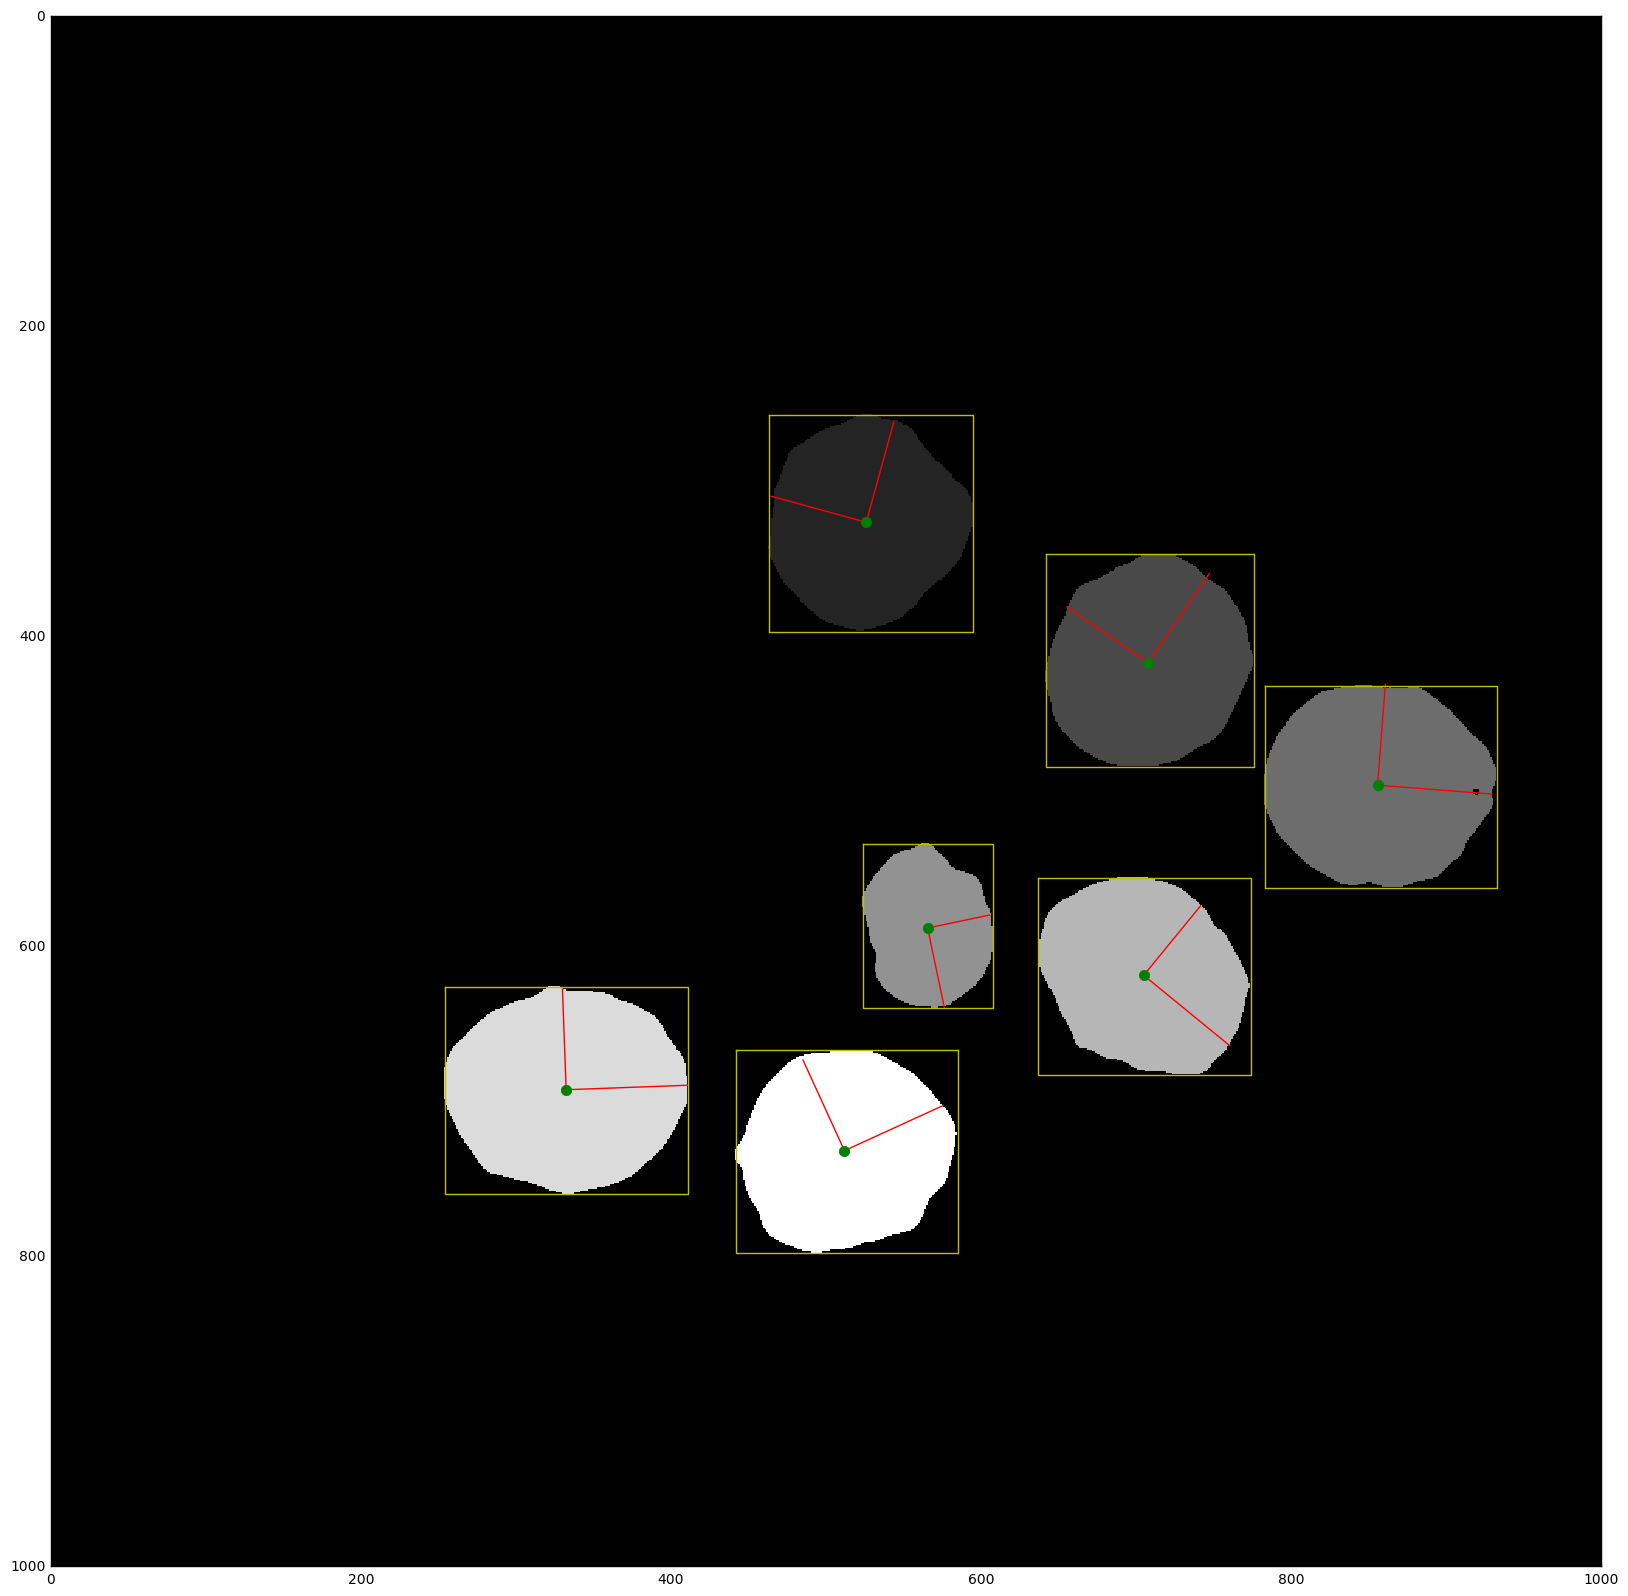

In [24]:
from skimage.measure import label, regionprops
import math
label_img = label(relabeled)
regions = regionprops(relabeled)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(relabeled, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth= 1)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth= 1)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, 'y', linewidth=1)

ax.axis((0, 1000, 1000, 0))
plt.show()